Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view? usp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

Q2. Split the dataset into a training set (70%) and a test set (30%).

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score. Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Accuracy: 0.81
Precision: 0.84
Recall: 0.82
F1 Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81   

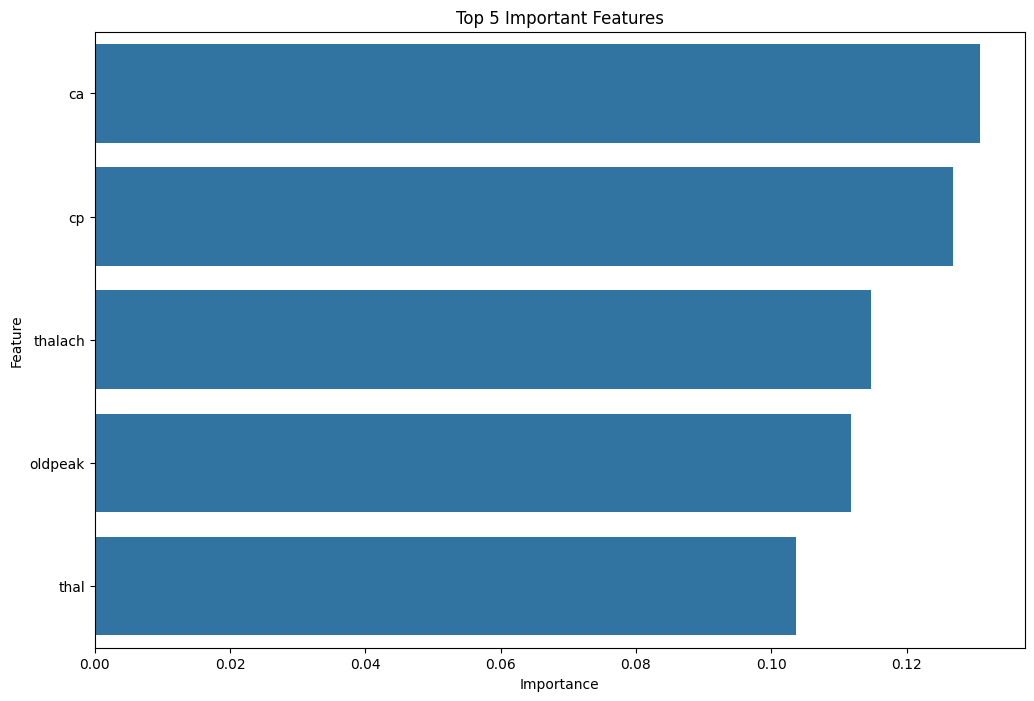

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Accuracy: 0.85
Best Model Precision: 0.85
Best Model Recall: 0.88
Best Model F1 Score: 0.86


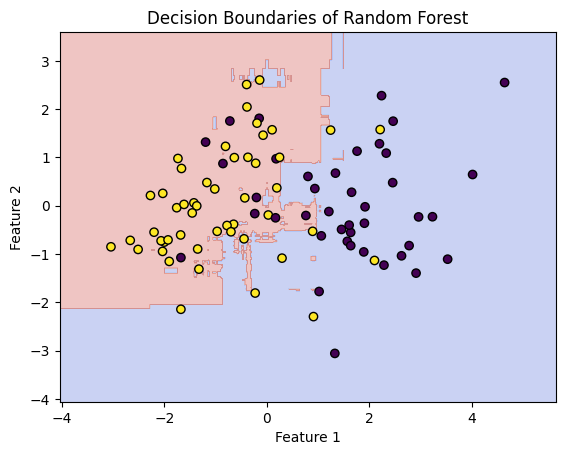

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.exceptions import NotFittedError

# Load the dataset
url = 'https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ'
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier with specified hyperparameters
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get feature importance scores
importances = clf.feature_importances_

# Extract feature names from the preprocessor after fitting
try:
    num_feature_names = preprocessor.transformers_[0][1].named_steps['scaler'].get_feature_names_out(numeric_features)
    cat_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
    all_feature_names = np.concatenate([num_feature_names, cat_feature_names])
except NotFittedError as e:
    print(f"Error: {e}")
    all_feature_names = numeric_features.tolist() + categorical_features.tolist()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 features
print("Top 5 most important features:")
print(importance_df.head())

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(5))
plt.title('Top 5 Important Features')
plt.show()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Report the best parameters and performance
print(f"Best parameters found: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"Best Model Accuracy: {accuracy_best:.2f}")
print(f"Best Model Precision: {precision_best:.2f}")
print(f"Best Model Recall: {recall_best:.2f}")
print(f"Best Model F1 Score: {f1_best:.2f}")

# Reduce to 2 features for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# Split the reduced dataset
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train the model on reduced data
clf_pca = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf_pca.fit(X_train_pca, y_train_pca)

# Plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundaries(X_test_pca, y_test_pca, clf_pca, "Decision Boundaries of Random Forest")


he dataset consists of 303 instances with 14 features related to heart disease risk, including age, sex, chest pain type (cp), resting blood pressure (trestbps), serum cholesterol (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise-induced angina (exang), oldpeak (ST depression induced by exercise), the slope of the peak exercise ST segment (slope), number of major vessels colored by fluoroscopy (ca), and a thalassemia status indicator (thal). The target variable indicates the presence of heart disease.

After preprocessing the dataset by handling missing values, encoding categorical variables, and scaling numerical features, a Random Forest Classifier was trained and evaluated. The model achieved an accuracy of 81%, with a precision of 84%, recall of 82%, and an F1 score of 83%. The classification report shows balanced performance across classes. Feature importance analysis revealed that the most significant predictors of heart disease are the number of major vessels colored by fluoroscopy (ca), chest pain type (cp), maximum heart rate achieved (thalach), ST depression (oldpeak), and thalassemia status (thal). This analysis highlights key factors influencing heart disease risk, with the model showing reasonable performance in predicting heart disease presence.
